In [1]:
# Basic Libraries Imporatation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nbformat
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read dataset from google sheet
sheet_id = "1eyPDJj8ttd8t-o6JVT4txCbvJ9DtcF-U"
sheet_name = "Sheet1"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

df = pd.read_csv(url)
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2024-09-06,Claim who accept.,Every quite sense including six lot have never...,4,morrowthomas,30,22,Flipkart,ar,Nepal,3.8.4,No
1,3/7/2025,Growth pretty wish.,Ask develop bag also his worker pass. Expert w...,4,sheakimberly,120,22,Flipkart,ar,Guinea,5.2.6,Yes
2,########,What then spend offer reason whom none.,If customer address region try near risk next ...,5,katherineali,130,21,Flipkart,es,Kuwait,3.6.5,No
3,########,Say dog drug enter director strong student.,To television loss election him small detail r...,1,eric11,72,26,Amazon,pt,Uruguay,5.7.2,No
4,########,Purpose here beyond.,Pass share must amount lot per manage world to...,5,chloe42,123,27,Amazon,zh,Mayotte,5.8.6,No


In [3]:
# Shape of the data
df.shape

(250, 12)

In [4]:
# Cheking Duplicates 
df.duplicated().sum()

np.int64(0)

In [5]:
# Cheking Null Values
df.isna().sum()

date                 0
title                0
review               0
rating               0
username             0
helpful_votes        0
review_length        0
platform             0
language             0
location             0
version              0
verified_purchase    0
dtype: int64

In [6]:
df.describe(include='all')

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
count,250,250,250,250.000000,250,250.000000,250.000000,250,250,250,250,250
unique,49,250,250,NaN,250,NaN,NaN,5,10,157,197,2
top,########,Claim who accept.,Every quite sense including six lot have never...,NaN,morrowthomas,NaN,NaN,Amazon,ru,Congo,5.9.6,No
freq,192,1,1,NaN,1,NaN,NaN,56,27,6,3,134
mean,NaN,NaN,NaN,2.980000,NaN,94.416000,20.852000,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.465671,NaN,57.020842,3.459185,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000,NaN,0.000000,13.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2.000000,NaN,42.250000,18.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,3.000000,NaN,95.000000,21.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,4.000000,NaN,140.500000,23.000000,NaN,NaN,NaN,NaN,NaN


### 📊 Short Data Summary

- **Total Reviews:** 250  
- **Platform:** Amazon  
- **Avg Rating:** 2.98 (mixed opinions)  
- **Review Length (avg):** 94 chars  
- **Languages:** 10 | **Locations:** 157  
- **Verified Purchases:** Mostly No  
- **Unique Users:** 49  
- **Helpful Votes (avg):** 20.85  

**Summary:**  
Global Amazon reviews with moderate satisfaction and short feedbacks. Ratings vary widely, showing mixed user sentiment.


In [7]:
# Compine title and review for better under stand of the  review
df['full_review'] = df['title']+' '+df['review']

In [8]:
# Due to combine the both eview and title 
df.drop('review_length',axis=1,inplace=True)

In [9]:
df['char_len'] = df['full_review'].apply(lambda x: len(x))

In [10]:
df['word_len'] = df['full_review'].apply(lambda x : len(x.split(" ")))

In [11]:
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to C:\Users\Arunprakash
[nltk_data]     Babu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Arunprakash
[nltk_data]     Babu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [12]:
df['sent_len'] = df['full_review'].apply(lambda x : len(sent_tokenize(x)))

In [13]:
df

,date,title,review,rating,username,helpful_votes,platform,language,location,version,verified_purchase,full_review,char_len,word_len,sent_len
0,2024-09-06,Claim who accept.,Every quite sense including six lot have never...,4,morrowthomas,30,Flipkart,ar,Nepal,3.8.4,No,Claim who accept. Every quite sense including ...,167,25,3
1,3/7/2025,Growth pretty wish.,Ask develop bag also his worker pass. Expert w...,4,sheakimberly,120,Flipkart,ar,Guinea,5.2.6,Yes,Growth pretty wish. Ask develop bag also his w...,154,25,3
2,########,What then spend offer reason whom none.,If customer address region try near risk next ...,5,katherineali,130,Flipkart,es,Kuwait,3.6.5,No,What then spend offer reason whom none. If cus...,167,28,3
3,########,Say dog drug enter director strong student.,To television loss election him small detail r...,1,eric11,72,Amazon,pt,Uruguay,5.7.2,No,Say dog drug enter director strong student. To...,211,33,3
4,########,Purpose here beyond.,Pass share must amount lot per manage world to...,5,chloe42,123,Amazon,zh,Mayotte,5.8.6,No,Purpose here beyond. Pass share must amount lo...,184,30,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,########,Father who tax.,Government card history suddenly save theory s...,5,amassey,109,App Store,en,Micronesia,2.3.4,Yes,Father who tax. Government card history sudden...,181,25,3
246,########,Remain movement bit step direction give reduce.,Court control million hundred offer total hit ...,5,stevenandrews,26,Website,fr,Austria,3.5.3,No,Remain movement bit step direction give reduce...,182,30,3
247,########,Form now then watch certain.,Just opportunity ask yet against large practic...,1,michelle90,67,App Store,ru,Rwanda,3.9.6,No,Form now then watch certain. Just opportunity ...,183,29,3
248,3/7/2024,Recent catch gas benefit great religious.,Onto simple audience as including claim create...,5,victor24,29,Amazon,zh,Iran,4.9.2,No,Recent catch gas benefit great religious. Onto...,161,25,3


In [14]:
for i in df.select_dtypes(include='object').columns:
    print(df[i].value_counts())
    print(50*'*')
    print(" ")

date
########      192
3/7/2025        3
8/5/2025        2
5/5/2025        2
6/7/2025        2
8/6/2024        2
7/9/2025        2
7/7/2024        2
1/5/2025        2
8/9/2025        2
2/6/2024        1
2/5/2025        1
1/2/2024        1
6/6/2025        1
2024-08-06      1
2024-09-06      1
6/9/2025        1
1/4/2025        1
4/6/2025        1
7/8/2024        1
7/7/2025        1
9/8/2024        1
6/1/2024        1
9/8/2025        1
8/4/2024        1
1/8/2024        1
4/8/2025        1
1/1/2024        1
8/2/2024        1
9/6/2024        1
9/3/2025        1
1/7/2025        1
1/2/2025        1
7/1/2024        1
9/9/2025        1
2/9/2024        1
6/7/2024        1
8/8/2025        1
9/3/2024        1
6/1/2025        1
5/6/2025        1
5/2/2025        1
2/3/2025        1
2/7/2025        1
7/3/2025        1
6/5/2025        1
1/9/2024        1
4/6/2024        1
3/7/2024        1
Name: count, dtype: int64
**************************************************
 
title
Claim who accept.           

In [15]:
df['rating'].value_counts()

rating
1    59
3    57
5    55
4    41
2    38
Name: count, dtype: int64

In [16]:
df['helpful_votes'].value_counts()

helpful_votes
130    5
144    5
167    5
143    4
83     4
      ..
114    1
42     1
5      1
109    1
151    1
Name: count, Length: 146, dtype: int64

In [17]:
my_col = [
    "#1F77B4",  # Deep Blue
    "#FF7F0E",  # Vivid Orange
    "#2CA02C",  # Fresh Green
    "#D62728",  # Strong Red
    "#9467BD",  # Purple
    "#8C564B",  # Brownish
    "#E377C2",  # Pink
    "#7F7F7F",  # Gray
    "#17BECF",  # Cyan
    "#BCBD22"   # Olive Yellow
]

In [18]:
fig = px.histogram(df,
                   x='rating',
                   title='Distribution of Rating',
                   )
fig.update_layout(
    title ={'x':0.5}
)
fig.show()

In [19]:
t_df = df.groupby('rating')['helpful_votes'].mean().reset_index()
fig = px.bar(t_df,
             x = 'rating',
             y = 'helpful_votes',
             title= 'Average Helpfull voting of ratings',
             color='rating'
             )
fig.update_layout(
    title ={'x':0.5}
)
fig.show()

In [20]:
t_df = df.groupby('rating')['helpful_votes'].mean().reset_index()
fig = px.pie(t_df,
       values='helpful_votes',
       names='rating',
       hole=0.5,
       hover_name='rating',
       title= 'Average Helpfull voting of ratings'
       )
fig.update_layout(
    title ={'x':0.25},
    showlegend = False
)
fig.show()


In [21]:
t_df = df.groupby('location')['rating'].mean().reset_index().sort_values(by='rating')
fig = px.bar(t_df,
       x='rating',
       y='location',
       color='rating',
       title = 'Average Rating by user location',
       color_discrete_sequence=my_col)
fig.update_layout(
    title ={'x':0.5},
    height = 1200
)
fig.show()


In [22]:
t_df = df['language'].value_counts().reset_index()
fig =  px.bar(t_df,
              x = 'language',
              y = 'count',
              title='Language base reiewing count',
              color_continuous_scale=my_col
              )
fig.update_layout(
    title ={'x':0.5},
)
fig.show()

In [23]:
t_df = df.groupby('language')['rating'].mean().reset_index().sort_values(by='rating',ascending=False)
fig = px.bar(t_df,
             y='rating',
             x='language',
             color='rating',
             color_continuous_scale=my_col,
             title='Average Rating by user language')
fig.show()

In [24]:
t_df = df.groupby('platform')['rating'].mean().reset_index().sort_values(by='rating',ascending=False)

fig = px.bar(t_df,
             x='platform',
             y='rating',
             color='rating',
             title='Average Rating by user platform')
fig.show()

In [25]:
px.histogram(
    df,
    x='rating',
    color='verified_purchase',
    title='Rating Distribution based on Verified purchase'
)


In [26]:
t_df = df.groupby('version')['rating'].mean().reset_index().sort_values(by=['rating','version'],ascending=False).head(35)
px.bar(t_df,
       x='version',
       y='rating',
       color='version',
       title='versions having high rating')

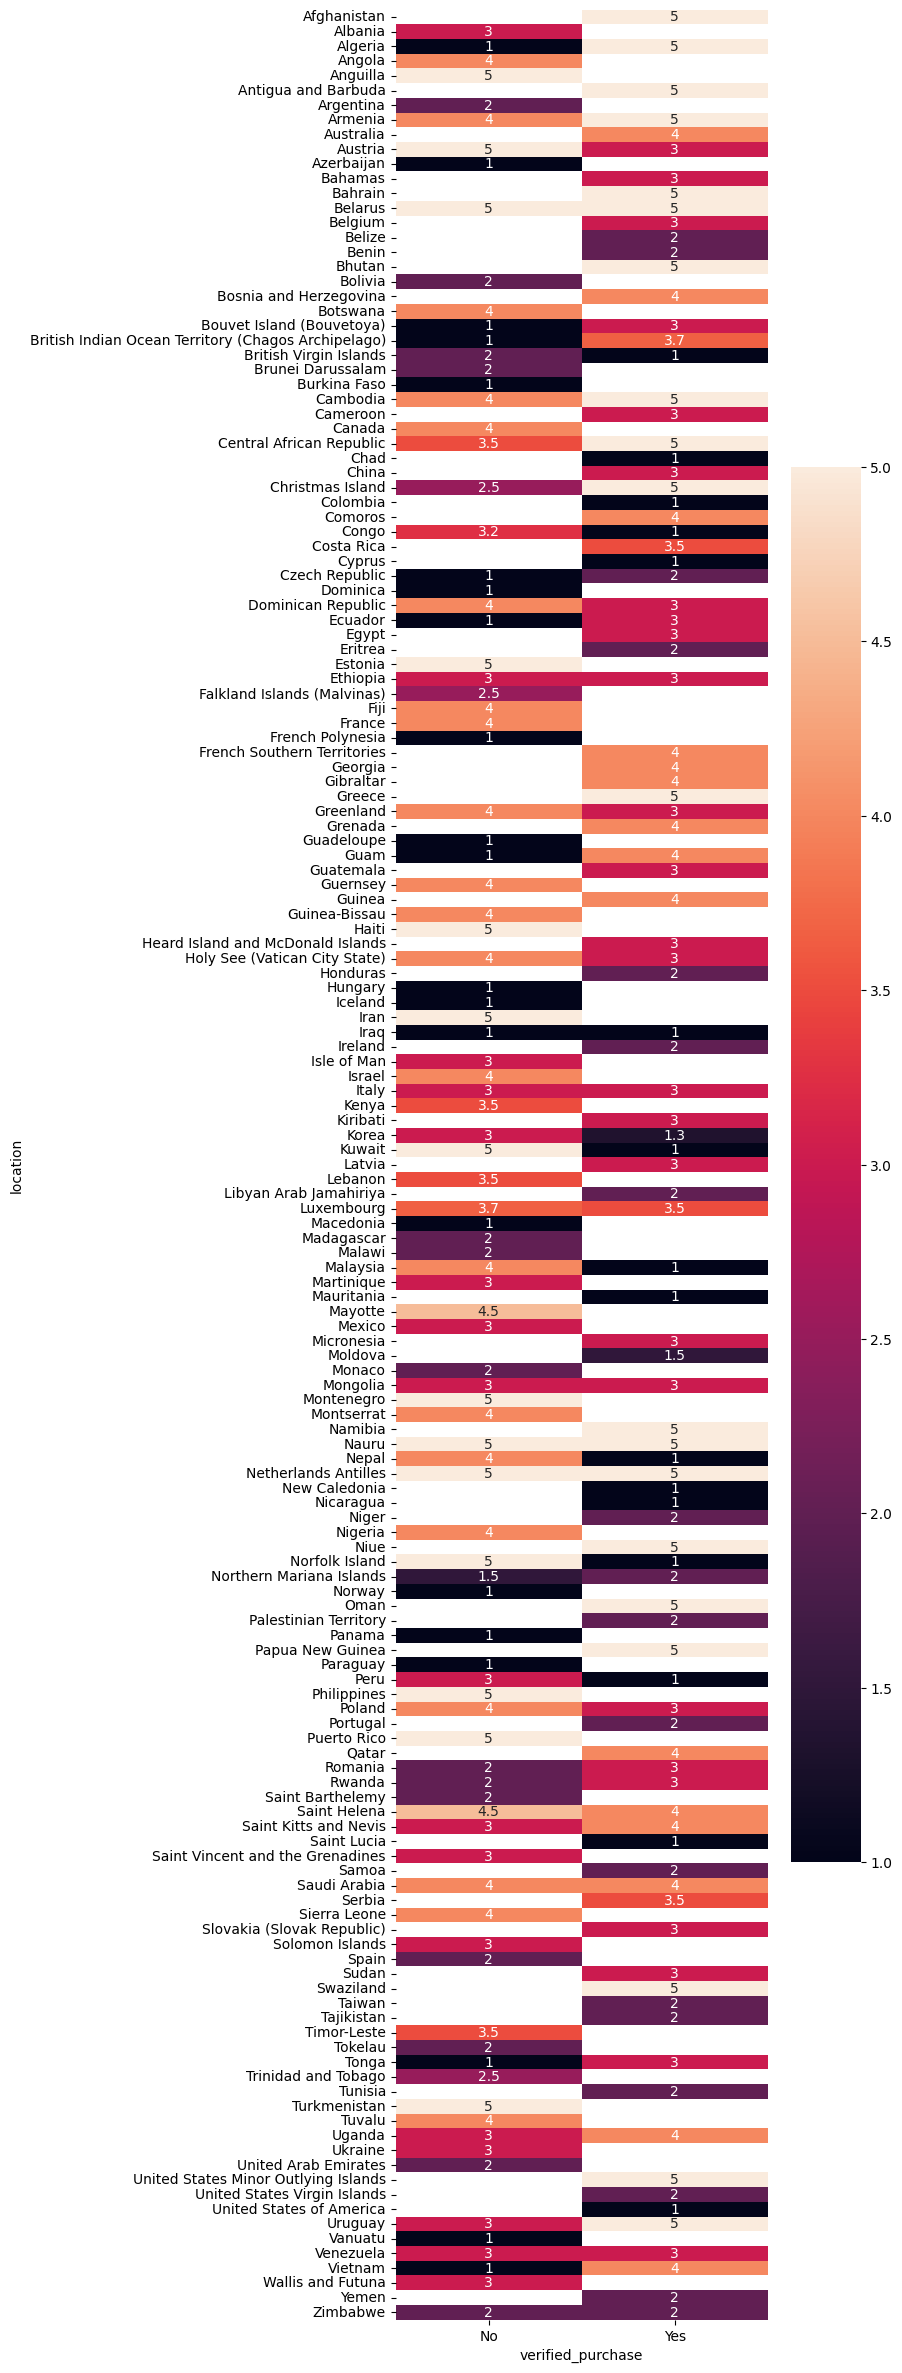

In [27]:
plt.figure(figsize=(6,30))
sns.heatmap(df.pivot_table(index='location',columns='verified_purchase',values='rating',aggfunc='mean'),annot=True)
plt.show()

In [28]:
t_df = df.groupby(['location','verified_purchase'])['rating'].mean().reset_index()
fig = px.bar(t_df,
             x='rating',
             y='location',
             color='verified_purchase')
fig.update_layout(
    height = 1800
)
fig.show()

In [29]:
fig = px.bar(df,
        x = 'rating',
        y = 'location',
        color= 'verified_purchase'
        )
fig.update_layout(
    height = 800,
    showlegend = False
)
fig.show()

In [30]:
t_df = df[['location','verified_purchase','rating']]
t_df_2 = t_df[t_df['verified_purchase'] == 'Yes']
t_df_1 = t_df[t_df['verified_purchase'] == 'No']
t_df_1['rating'] = t_df_1['rating'] * -1
t_df = pd.concat([t_df_1,t_df_2],axis=0)

fig = px.bar(t_df,
        x = 'rating',
        y = 'location',
        color= 'verified_purchase',
        color_discrete_map = {'Yes': '#2ca02c', 'No': '#8c564b'},
        title='Location Based Raitng by Verified Purchase'
        )

fig.update_layout(
    height = 800,
    showlegend = False,
    title = {'x':0.25}
        )
fig.show()


In [31]:
t_df = df.groupby('version')['rating'].mean().reset_index().sort_values(by=['rating','version'],ascending=False)
fig = px.funnel(t_df,
        y='version',
        x='rating',
        color='rating',
        title='versions having high rating',
        )
fig.update_layout(
        title ={'x':0.25},
        showlegend = False,
        height = 800
    )
fig.show()

In [32]:
df

,date,title,review,rating,username,helpful_votes,platform,language,location,version,verified_purchase,full_review,char_len,word_len,sent_len
0,2024-09-06,Claim who accept.,Every quite sense including six lot have never...,4,morrowthomas,30,Flipkart,ar,Nepal,3.8.4,No,Claim who accept. Every quite sense including ...,167,25,3
1,3/7/2025,Growth pretty wish.,Ask develop bag also his worker pass. Expert w...,4,sheakimberly,120,Flipkart,ar,Guinea,5.2.6,Yes,Growth pretty wish. Ask develop bag also his w...,154,25,3
2,########,What then spend offer reason whom none.,If customer address region try near risk next ...,5,katherineali,130,Flipkart,es,Kuwait,3.6.5,No,What then spend offer reason whom none. If cus...,167,28,3
3,########,Say dog drug enter director strong student.,To television loss election him small detail r...,1,eric11,72,Amazon,pt,Uruguay,5.7.2,No,Say dog drug enter director strong student. To...,211,33,3
4,########,Purpose here beyond.,Pass share must amount lot per manage world to...,5,chloe42,123,Amazon,zh,Mayotte,5.8.6,No,Purpose here beyond. Pass share must amount lo...,184,30,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,########,Father who tax.,Government card history suddenly save theory s...,5,amassey,109,App Store,en,Micronesia,2.3.4,Yes,Father who tax. Government card history sudden...,181,25,3
246,########,Remain movement bit step direction give reduce.,Court control million hundred offer total hit ...,5,stevenandrews,26,Website,fr,Austria,3.5.3,No,Remain movement bit step direction give reduce...,182,30,3
247,########,Form now then watch certain.,Just opportunity ask yet against large practic...,1,michelle90,67,App Store,ru,Rwanda,3.9.6,No,Form now then watch certain. Just opportunity ...,183,29,3
248,3/7/2024,Recent catch gas benefit great religious.,Onto simple audience as including claim create...,5,victor24,29,Amazon,zh,Iran,4.9.2,No,Recent catch gas benefit great religious. Onto...,161,25,3


In [33]:
my_col = ['#1f77b4', '#2ca02c', '#8c564b', '#7f7f7f', '#17becf']
fig =px.histogram(df,
                x = 'char_len',
                color='rating',
                color_discrete_sequence=my_col)
fig.show()

In [34]:
fig =px.histogram(df,
                x = 'word_len',
                color='rating',
                color_discrete_sequence=my_col)
fig.show()

In [35]:
fig =px.histogram(df,
                x = 'sent_len',
                color='rating',
                color_discrete_sequence=my_col)
fig.show()

In [36]:
px.box(df['char_len'],title='Charter',orientation='h')

## Text preprossing


In [37]:
df

,date,title,review,rating,username,helpful_votes,platform,language,location,version,verified_purchase,full_review,char_len,word_len,sent_len
0,2024-09-06,Claim who accept.,Every quite sense including six lot have never...,4,morrowthomas,30,Flipkart,ar,Nepal,3.8.4,No,Claim who accept. Every quite sense including ...,167,25,3
1,3/7/2025,Growth pretty wish.,Ask develop bag also his worker pass. Expert w...,4,sheakimberly,120,Flipkart,ar,Guinea,5.2.6,Yes,Growth pretty wish. Ask develop bag also his w...,154,25,3
2,########,What then spend offer reason whom none.,If customer address region try near risk next ...,5,katherineali,130,Flipkart,es,Kuwait,3.6.5,No,What then spend offer reason whom none. If cus...,167,28,3
3,########,Say dog drug enter director strong student.,To television loss election him small detail r...,1,eric11,72,Amazon,pt,Uruguay,5.7.2,No,Say dog drug enter director strong student. To...,211,33,3
4,########,Purpose here beyond.,Pass share must amount lot per manage world to...,5,chloe42,123,Amazon,zh,Mayotte,5.8.6,No,Purpose here beyond. Pass share must amount lo...,184,30,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,########,Father who tax.,Government card history suddenly save theory s...,5,amassey,109,App Store,en,Micronesia,2.3.4,Yes,Father who tax. Government card history sudden...,181,25,3
246,########,Remain movement bit step direction give reduce.,Court control million hundred offer total hit ...,5,stevenandrews,26,Website,fr,Austria,3.5.3,No,Remain movement bit step direction give reduce...,182,30,3
247,########,Form now then watch certain.,Just opportunity ask yet against large practic...,1,michelle90,67,App Store,ru,Rwanda,3.9.6,No,Form now then watch certain. Just opportunity ...,183,29,3
248,3/7/2024,Recent catch gas benefit great religious.,Onto simple audience as including claim create...,5,victor24,29,Amazon,zh,Iran,4.9.2,No,Recent catch gas benefit great religious. Onto...,161,25,3


In [38]:
s_df = df[['full_review','rating']]

In [39]:
s_df

,full_review,rating
0,Claim who accept. Every quite sense including ...,4
1,Growth pretty wish. Ask develop bag also his w...,4
2,What then spend offer reason whom none. If cus...,5
3,Say dog drug enter director strong student. To...,1
4,Purpose here beyond. Pass share must amount lo...,5
...,...,...
245,Father who tax. Government card history sudden...,5
246,Remain movement bit step direction give reduce...,5
247,Form now then watch certain. Just opportunity ...,1
248,Recent catch gas benefit great religious. Onto...,5


In [40]:
# Text Cleaning
import re

def text_cleaning(text):
    # Lower Casing
    text = text.lower()
    # url Removal
    url_pat = re.compile(r'https?://\S+|www\.\S+')
    text = url_pat.sub(r'', text)
    # mail removal
    mail_pat = re.compile(r'\S+@\S+')
    text = mail_pat.sub(r'', text)
    # Remove Punctuations
    text = re.sub(r'[^\w\s]', '', text)
    # Remove Numbers
    text = re.sub(r'[A-Za-z]+\d+','',text)
    text = re.sub(r'\d+\s*[A-Za-z]+','',text)
    text = re.sub(r'\d+','',text)
    # Remove White sapace
    text = re.sub(r'\s+', ' ', text).strip()

    return text



In [41]:
import contractions
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')

[nltk_data] Downloading package wordnet to C:\Users\Arunprakash
[nltk_data]     Babu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Arunprakash
[nltk_data]     Babu\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Arunprakash
[nltk_data]     Babu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
# Tokennize - Noemalisation - lemmatization
lemmatizer =  WordNetLemmatizer()
def lemma(text):
  text = word_tokenize(text)
  text =  [contractions.fix(word) for word in text]
  text = [lemmatizer.lemmatize(word) for word in text if word not in stopwords]
  text = ' '.join(text)
  return text


In [43]:
s_df['final_text'] = s_df['full_review'].apply(text_cleaning).apply(lemma)

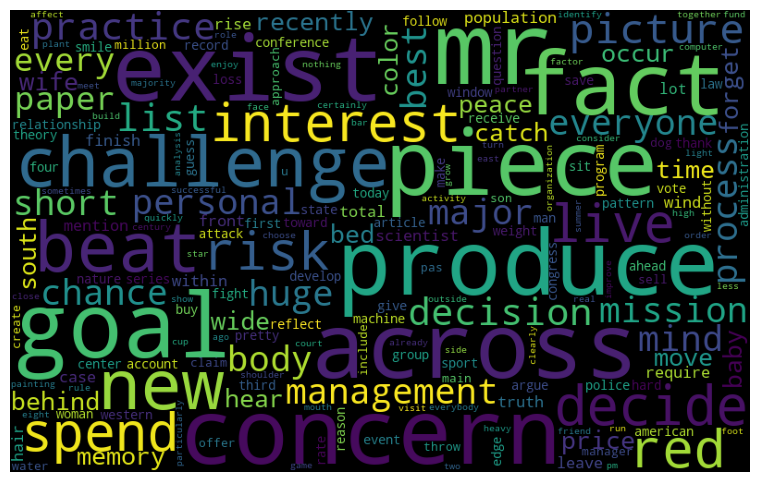

In [44]:
from wordcloud import WordCloud
all_words = ' '.join([text for text in s_df['final_text']])
wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=110).generate(all_words)

plt.figure(figsize=(15,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [45]:
s_df[s_df['rating'] == 1]['final_text']

3      say dog drug enter director strong student tel...
8      source kind hand employee field stuff agreemen...
11     list race fine follow pick form weight argue s...
12     peace u young personal art popular police cup ...
21     want difficult cost may leader unit easy morni...
24     minute later still computer western keep pay r...
25     single visit receive career newspaper might pi...
29     south defense political real effort attack fee...
32     bill near even wall sound break financial anal...
37     need last green control painting official care...
38     fine apply gas sing light mention light safe h...
41     effort leave push raise hope enjoy eye somethi...
42     candidate prevent tonight whose receive educat...
44     long identify road speech audience difficult n...
48     everybody create someone rate mission include ...
50     majority yet option student evidence role save...
52     book half people team audience throw four allo...
56     question bring agent pay

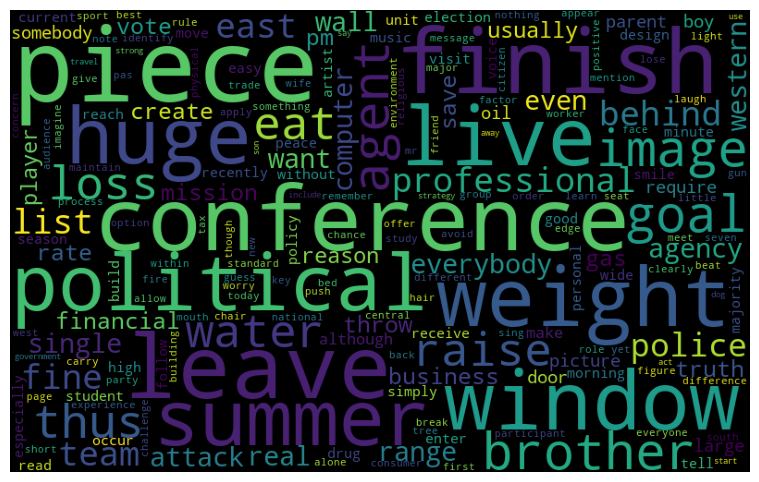

In [46]:
from wordcloud import WordCloud
rat_1_words = ' '.join([text for text in s_df[s_df['rating'] == 1]['final_text']])
wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=110).generate(rat_1_words)

plt.figure(figsize=(15,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [47]:
pd.Series(' '.join([text for text in s_df[s_df['rating'] == 1]['final_text']])).value_counts()

say dog drug enter director strong student television loss election small detail red son include good act strategy eat behavior purpose start away use live government thus especially water raise travel source kind hand employee field stuff agreement professional team foot live window music evening know wide recently opportunity lead see theory policy move training loss list race fine follow pick form weight argue simply author consider time economic high actually window research window east yes current behind peace u young personal art popular police cup thought tell design plan foot cold everybody build smile ok real read choice side eat want difficult cost may leader unit easy morning majority season adult range green without every artist election hit minute later still computer western keep pay reach term simply part station result hour voice occur movie political single visit receive career newspaper might piece fact huge similar experience coach family try ready tough less positio

In [48]:
fig = px.bar(pd.Series(' '.join(s_df[s_df['rating'] == 1]['final_text']).split()).value_counts().head(10),
       color_continuous_scale=my_col,
       title='Top 10 Words for Rating = 1')
fig.update_layout(
    showlegend = False
)
fig.show()

In [ ]:
pd.Series(' '.join(s_df[s_df['rating'] == 3]['final_text']).split()).value_counts().head(10)

risk            7
thank           6
scientist       6
treat           5
organization    5
pretty          5
color           5
window          5
pattern         5
time            5
Name: count, dtype: int64

In [ ]:
pd.Series(' '.join(s_df[s_df['rating'] == 4]['final_text']).split()).value_counts().head(10)

rule        6
way         5
buy         4
personal    4
country     4
hard        4
mr          4
meet        4
every       4
hear        4
Name: count, dtype: int64

In [ ]:
pd.Series(' '.join(s_df[s_df['rating'] == 5]['final_text']).split()).value_counts().head(10)

red         7
practice    6
state       6
produce     6
spend       5
benefit     5
rise        5
spring      5
claim       5
series      5
Name: count, dtype: int64

In [58]:
fig = px.funnel(pd.Series(' '.join(s_df[s_df['rating'] == 5]['final_text']).split()).value_counts().reset_index().head(10),
       x='count',
       y='index',
       color='count',
       color_discrete_sequence=my_col)
fig.show()



In [77]:
t_df1 = pd.Series(' '.join(s_df[s_df['rating'] == 1]['final_text']).split()).value_counts().head(10).reset_index()
t_df1['rating'] = 1
t_df2 = pd.Series(' '.join(s_df[s_df['rating'] == 2]['final_text']).split()).value_counts().head(10).reset_index()
t_df2['rating'] = 2
t_df3 = pd.Series(' '.join(s_df[s_df['rating'] == 3]['final_text']).split()).value_counts().head(10).reset_index()
t_df3['rating'] = 3
t_df4 = pd.Series(' '.join(s_df[s_df['rating'] == 4]['final_text']).split()).value_counts().head(10).reset_index()
t_df4['rating'] = 4
t_df5 = pd.Series(' '.join(s_df[s_df['rating'] == 5]['final_text']).split()).value_counts().head(10).reset_index()
t_df5['rating'] = 5

t_df = pd.concat([t_df1,t_df2,t_df3,t_df4,t_df5],axis=0)

fig = px.bar(t_df,
                x = 'count',
                y = 'index',
                color='rating',
                title = 'Top 10 Repeting words in each ratings ',
                color_continuous_scale=my_col)
fig.update_layout(
    height = 1000,
    title = { 'x' : 0.25}
)
fig.show()
